In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk


In [ ]:
with h5py.File('./Reports/E_T_20_09_11_Session1_sleep_1_Calibrated_SD_hrv.mat', 'r') as f:
    res = f['Res']
    print("f:", list(res.keys()))
    
    CNT = res['CNT']
    cnt_data = list(CNT.keys())
    print("f-CNT:", cnt_data)

    data_type = res['DataType'][()]
    data_type_str = ''.join(chr(c) for c in data_type.flatten())
    print("f-DataType:", data_type_str)

    hrv_obj = res['HRV']
    print("f-HRV", list(hrv_obj.keys()))

    data = res['HRV']['Data']
    print("f-HRV-data", list(data.keys()))

    data = res['HRV']['Frequency']
    print("f-HRV-Frequency", list(data.keys()))

    data = res['HRV']['TimeVar']
    print("f-HRV-Frequency", list(data.keys()))

f: ['CNT', 'DataType', 'HRV', 'f_name', 'f_path']
f-CNT: ['CntEle', 'CntEve', 'CntGen', 'EKG', 'FileType', 'Label', 'Length', 'Offset', 'rate']
f-DataType: PPG
f-HRV ['Data', 'Frequency', 'NonLinear', 'Param', 'Statistics', 'Summary', 'TimeVar', 'timevaranalOK']
f-HRV-data ['BeatsCorrected', 'BeatsCorrectedPrc', 'BeatsTotal', 'EffectiveDataPrc', 'EffectiveDataSec', 'RR', 'RRcorrtimes', 'RRdt', 'RRdti', 'RRi', 'RRs', 'RRsdt', 'RRsdti', 'RRsi', 'Rsgn', 'T_RR', 'T_RRi', 'T_RRorig', 'T_RRs', 'T_RRsi', 'tmp']
f-HRV-Frequency ['AR', 'EDR', 'Welch']
f-HRV-Frequency ['AC', 'ACmod', 'ApEn', 'BMR', 'BMRd', 'BeatsCorrected', 'BeatsCorrectedPrc', 'BeatsTotal', 'DC', 'DCmod', 'DFA_alpha1', 'DFA_alpha2', 'EDRm', 'EE', 'EEact', 'EffectiveDataPrc', 'EffectiveDataSec', 'Ftvpsd', 'HF_peak', 'HF_power', 'HF_power_nu', 'HF_power_prc', 'HR', 'HRV_tri_ind', 'HRave', 'HRmax', 'HRmin', 'HRzones', 'HRzones_def', 'HRzones_label', 'HRzones_prc', 'HRzones_sec', 'LF_HF_power', 'LF_peak', 'LF_power', 'LF_power_nu',

Len PPG: 20480
Sample Rate: 1024


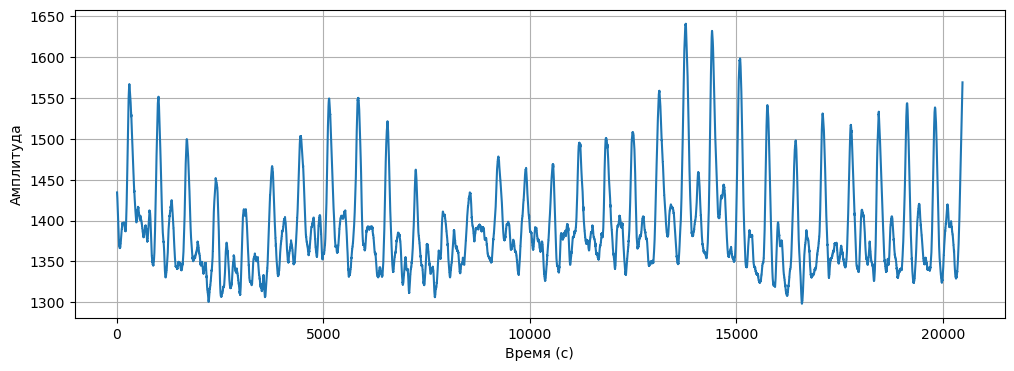

In [11]:
ppg_signal = 0
fs = 0

with h5py.File('./Reports/E_T_20_09_11_Session1_sleep_1_Calibrated_SD_hrv.mat', 'r') as f:
    res = f['Res']
    
    if 'CNT' in res and 'EKG' in res['CNT']:
        ppg_signal = res['CNT']['EKG'][()][0]
        fs = int(list(res['CNT']['rate']['EKG'])[0][0])
        ppg_signal = ppg_signal[fs * 10 : fs * 30]

        print("Len PPG:", len(ppg_signal))
        print("Sample Rate:", fs)
        
        plt.figure(figsize=(12, 4))
        plt.plot(ppg_signal)
        plt.xlabel('Время (с)')
        plt.ylabel('Амплитуда')
        plt.grid()
        plt.show()


In [9]:
ppg_signal = 0
fs = 0

with h5py.File('./Reports/E_T_20_09_11_Session1_sleep_1_Calibrated_SD_hrv.mat', 'r') as f:
    res = f['Res']
    data = list(res['HRV']['TimeVar']['logHF_power'])
    print(data)
    # if 'CNT' in res and 'EKG' in res['CNT']:
    #     ppg_signal = res['CNT']['EKG'][()][0]
    #     fs = int(list(res['CNT']['rate']['EKG'])[0][0])
    #     ppg_signal = ppg_signal[fs * 10 : fs * 30]

    #     print("Len PPG:", len(ppg_signal))
    #     print("Sample Rate:", fs)
        
    #     plt.figure(figsize=(12, 4))
    #     plt.plot(ppg_signal)
    #     plt.xlabel('Время (с)')
    #     plt.ylabel('Амплитуда')
    #     plt.grid()
    #     plt.show()

[array([4.06385803, 4.2441179 , 4.15418599, 4.04642924, 4.11045258,
       4.36537345, 4.47215958, 4.21505342, 3.84491376, 3.69767543,
       3.88106025, 3.73137249, 3.67470829, 4.17370851, 4.49042022,
       4.58196402, 4.64654776, 4.60379525, 4.54826068, 4.46510911,
       4.46411793, 4.43514379, 4.53636492, 4.65992282, 4.78087354,
       4.71218636])]


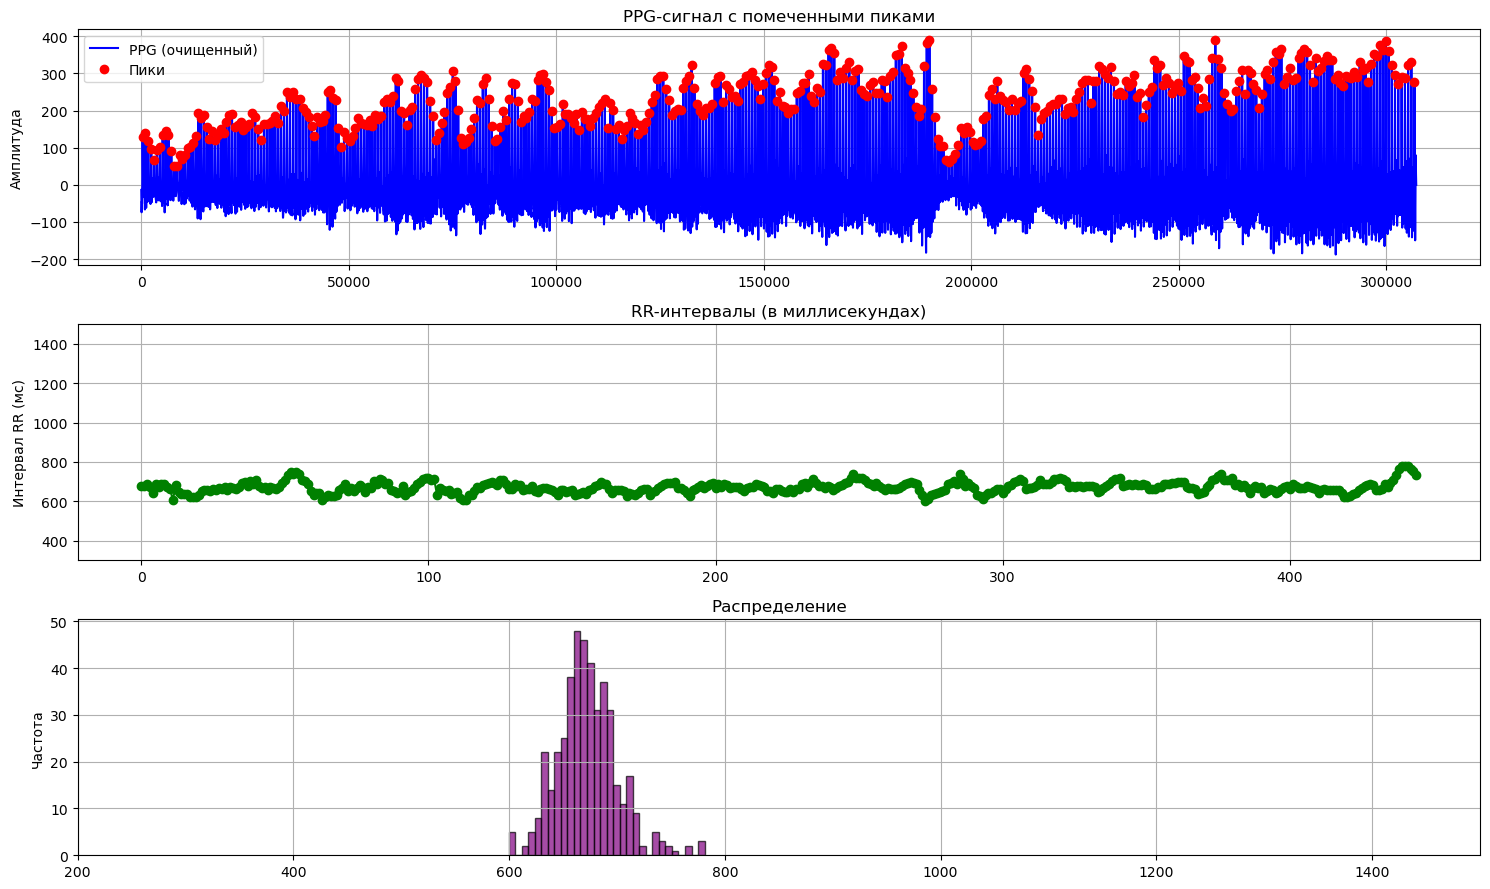

In [5]:
signals, info = nk.ppg_process(ppg_signal, sampling_rate=fs)

rpeaks = info["PPG_Peaks"]
rr_intervals = np.diff(rpeaks) / fs * 1000

fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=False)

# 1. PPG-сигнал с пиками
axs[0].plot(signals["PPG_Clean"], label="PPG (очищенный)", color='blue')
axs[0].plot(rpeaks, signals["PPG_Clean"][rpeaks], 'ro', label="Пики")
axs[0].set_title("PPG-сигнал с помеченными пиками")
axs[0].set_ylabel("Амплитуда")
axs[0].legend()
axs[0].grid(True)
# axs[0].set_ylim(-3,3)

# 2. RR-интервалы во времени
axs[1].plot(rr_intervals, marker='o', color='green')
axs[1].set_title("RR-интервалы (в миллисекундах)")
axs[1].set_ylabel("Интервал RR (мс)")
axs[1].grid(True)
axs[1].set_ylim(300,1500)

# 3. Гистограмма RR-интервалов
axs[2].hist(rr_intervals, bins=30, color='purple', edgecolor='black', alpha=0.7)
axs[2].set_title("Распределение")
axs[2].set_ylabel("Частота")
axs[2].grid(True)
axs[2].set_xlim(200,1500)
# axs[2].set_ylim(0,150)

plt.tight_layout()
plt.show()


In [6]:
data_rr = 0
with h5py.File('./Reports/E_T_20_09_11_Session1_sleep_1_Calibrated_SD_hrv.mat', 'r') as f:
    res = f['Res']
    data_rr = (list(res['HRV']['Data']['RR'])[0]) * 1000

print("f-HRV-data-RR", data_rr)

f-HRV-data-RR [616.2109375 616.2109375 605.46875   ... 729.4921875 729.4921875
 729.4921875]


In [7]:
sl_data_rr = data_rr[fs * 10 : fs * 310]
sl_data_rr

print(len(data_rr))

2604


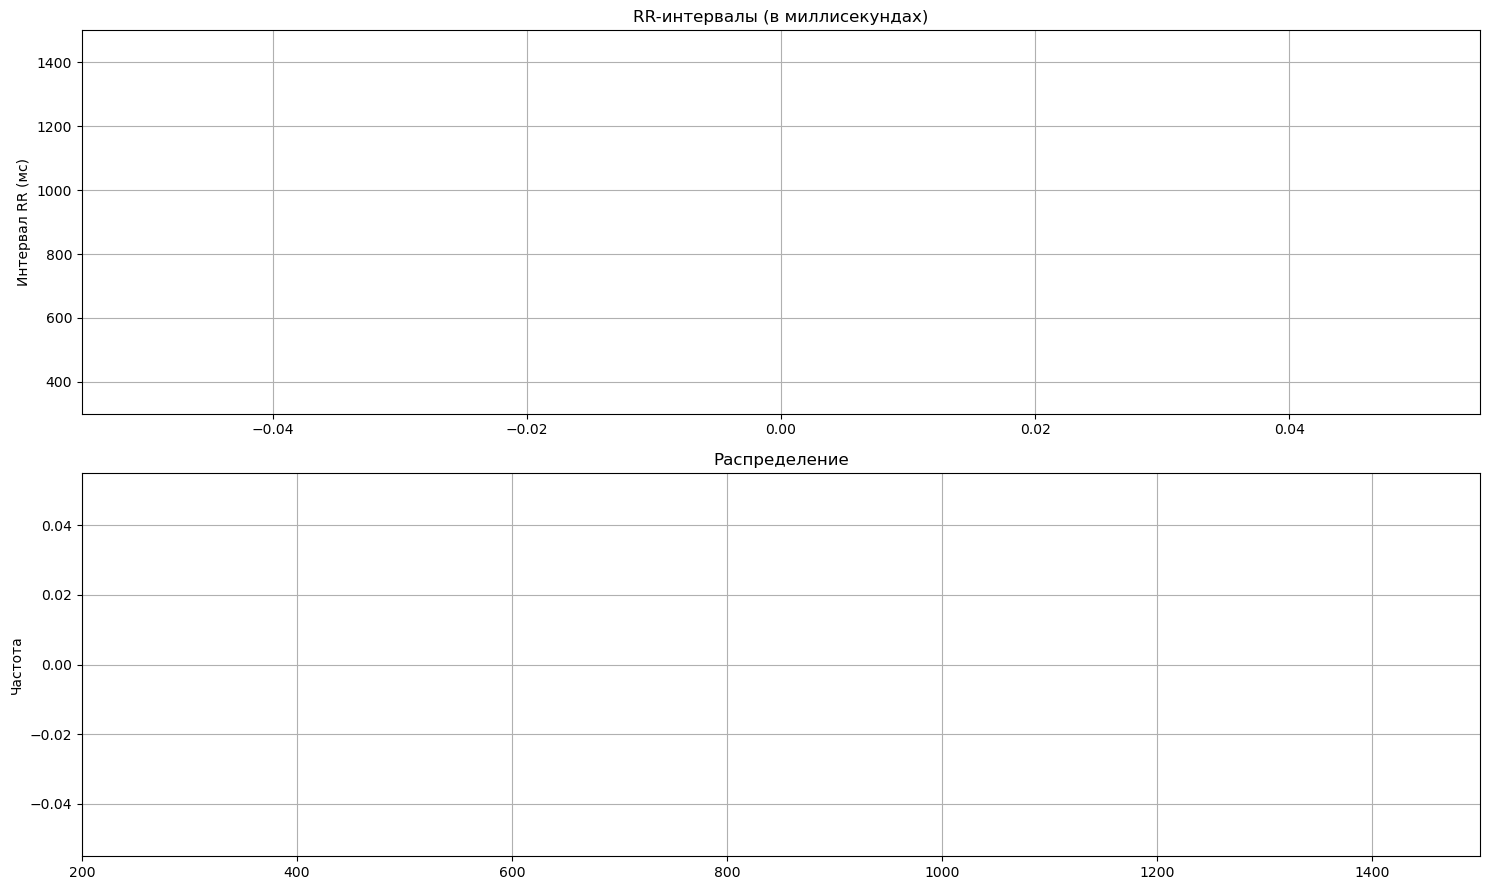

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9))

# 2. RR-интервалы во времени
axs[0].plot(sl_data_rr, marker='o', color='green')
axs[0].set_title("RR-интервалы (в миллисекундах)")
axs[0].set_ylabel("Интервал RR (мс)")
axs[0].grid(True)
axs[0].set_ylim(300,1500)

# 3. Гистограмма RR-интервалов
axs[1].hist(sl_data_rr, bins=30, color='purple', edgecolor='black', alpha=0.7)
axs[1].set_title("Распределение")
axs[1].set_ylabel("Частота")
axs[1].grid(True)
axs[1].set_xlim(200,1500)
# axs[2].set_ylim(0,150)

plt.tight_layout()
plt.show()
